In [1]:
import random
import matplotlib.pyplot as plt

def fuzz(std):
    return random.gauss(0,std)

def make_data(a, b, n=100, std=0.7):
    xs = [random.random() * 3 for _ in range(100)]
    ys = [b * xi + a + fuzz(std) for xi in xs]
    return xs, ys

def mean(xs):
    return sum(xs)/len(xs)

def ss(xs):
    mx = mean(xs)
    return sum([(xi - mx)**2 for xi in xs])

def standard_deviation(xs):
    ssx = ss(xs)
    return (ssx/len(xs))**0.5

def correlation(xs, ys):
    mx, my = mean(xs), mean(ys)
    ssx, ssy = ss(xs), ss(ys)
    sscross = sum([(xi - mx)*(yi - my) for xi, yi in zip(xs, ys)])
    return sscross / (ssx * ssy)**0.5

def linreg(xs, ys):
    beta = correlation(xs, ys) * standard_deviation(ys) / standard_deviation(xs)
    alpha = mean(ys) - beta * mean(xs)
    return alpha, beta


estimated params: -5.059214834797048 2.945485475832203


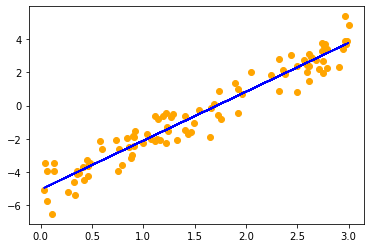

In [4]:
a, b = -5, 3
xs, ys = make_data(a, b)
plt.scatter(xs, ys, color='orange')
alpha, beta = linreg(xs, ys)
plt.plot(xs, [beta * xi + alpha for xi in xs], color='blue')
print(f"estimated params: {alpha} {beta}")